# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction

< y >
* **Price** : The price of the used car in INR Lakhs.



< X >
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Data
data = pd.read_csv("/content/drive/MyDrive/Tobigs/Week2/Week2_Regression/과제/assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<Axes: ylabel='Frequency'>

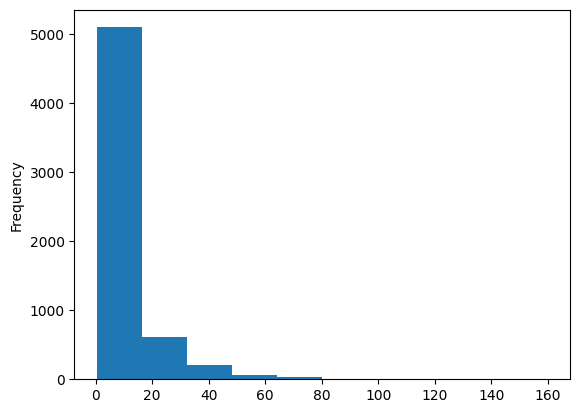

In [6]:
data["Price"].plot.hist()

<Axes: >

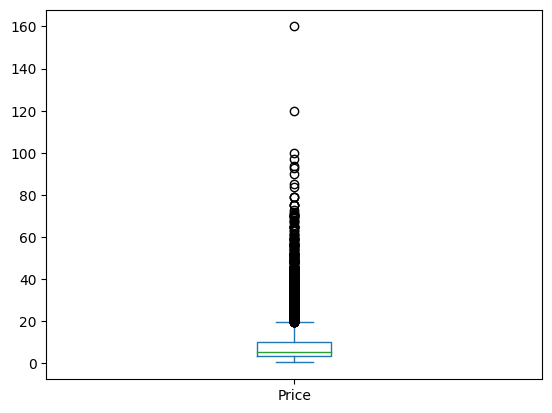

In [7]:
data["Price"].plot.box()

목표 변수인 "Price" 변수만 조사해보았다.

In [8]:
data["Unnamed: 0"]

0          0
1          1
2          2
3          3
4          4
        ... 
6014    6014
6015    6015
6016    6016
6017    6017
6018    6018
Name: Unnamed: 0, Length: 6019, dtype: int64

In [9]:
data = data.drop("Unnamed: 0", axis=1)

통계적 의미가 없는 "Unnamed: 0" column을 삭제해주었다.

In [10]:
Power_split = data['Power'].str.split(" ")

data['Power_float'] = Power_split.str.get(0)

In [11]:
len(data['Power_float'][data['Power_float']=='null'])

107

In [12]:
data['Power_float'] = data['Power_float'].replace('null', 0).astype(float)

In [13]:
data['Power_float'] = data['Power_float'].replace(0, data['Power_float'].mean()).fillna(data['Power_float'].mean())

원본 데이터의 "Power" 열의 데이터를 숫자만 추출하여 "Power_float" 열을 새로 만들어주고, null 또는 nan 데이터는 데이터의 평균치로 대체해주었다.

In [14]:
Mileage_split = data['Mileage'].str.split(" ")

data['Mileage_float'] = Mileage_split.str.get(0).astype(float)

In [15]:
data['Mileage_float'] = data['Mileage_float'].fillna(data['Mileage_float'].mean())
data['Mileage_float'].isnull().sum()

0

In [16]:
Engine_split = data['Engine'].str.split(" ")

data['Engine_float'] = Engine_split.str.get(0).astype(float)
data['Engine_float']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine_float, Length: 6019, dtype: float64

In [17]:
data['Engine_float'] = data['Engine_float'].fillna(data['Engine_float'].mean())
data['Engine_float'].isnull().sum()

0

"Mileage", "Engine" column의 데이터 또한 회귀분석을 위해 단위를 빼고 숫자만 추려서 따로 저장해주었다.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
 13  Power_float        6019 non-null   float64
 14  Mileage_float      6019 non-null   float64
 15  Engine_float       6019 non-null   float64
dtypes: float64(5), int64(2),

In [19]:
data['Seats'] = data['Seats'].fillna(data['Seats'].mean())
data['Seats'].isna().sum()

0

In [20]:
numeric_columns = ['Year', 'Kilometers_Driven', 'Mileage_float', 'Engine_float', 'Power_float', 'Seats', 'Price']

In [56]:
numeric_data = data[numeric_columns]

In [57]:
numeric_data

,Year,Kilometers_Driven,Mileage_float,Engine_float,Power_float,Seats,Price
0,2010,72000,26.60,998.0,58.16,5.0,1.75
1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90
6017,2013,46000,18.90,998.0,67.10,5.0,2.65


회귀분석을 위해 사용될 수치형 변수들만 추려서 새로운 데이터프레임을 만들어주었다.

In [23]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6019 non-null   int64  
 1   Kilometers_Driven  6019 non-null   int64  
 2   Mileage_float      6019 non-null   float64
 3   Engine_float       6019 non-null   float64
 4   Power_float        6019 non-null   float64
 5   Seats              6019 non-null   float64
 6   Price              6019 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 329.3 KB


<Axes: >

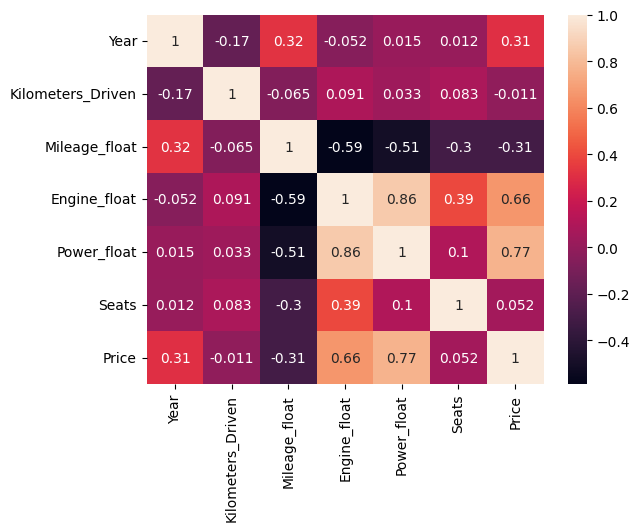

In [24]:
sns.heatmap(numeric_data.corr(), annot=True)

상관계수를 살펴봤을 때, Engine_float과 Power_float 간의 상관계수가 0.86으로 매우 크다. \

또한 Engine_float과 Mileage_float 간의 상관계수도 -0.59로 유의미한 상관관계가 존재한다고 볼 수 있다.


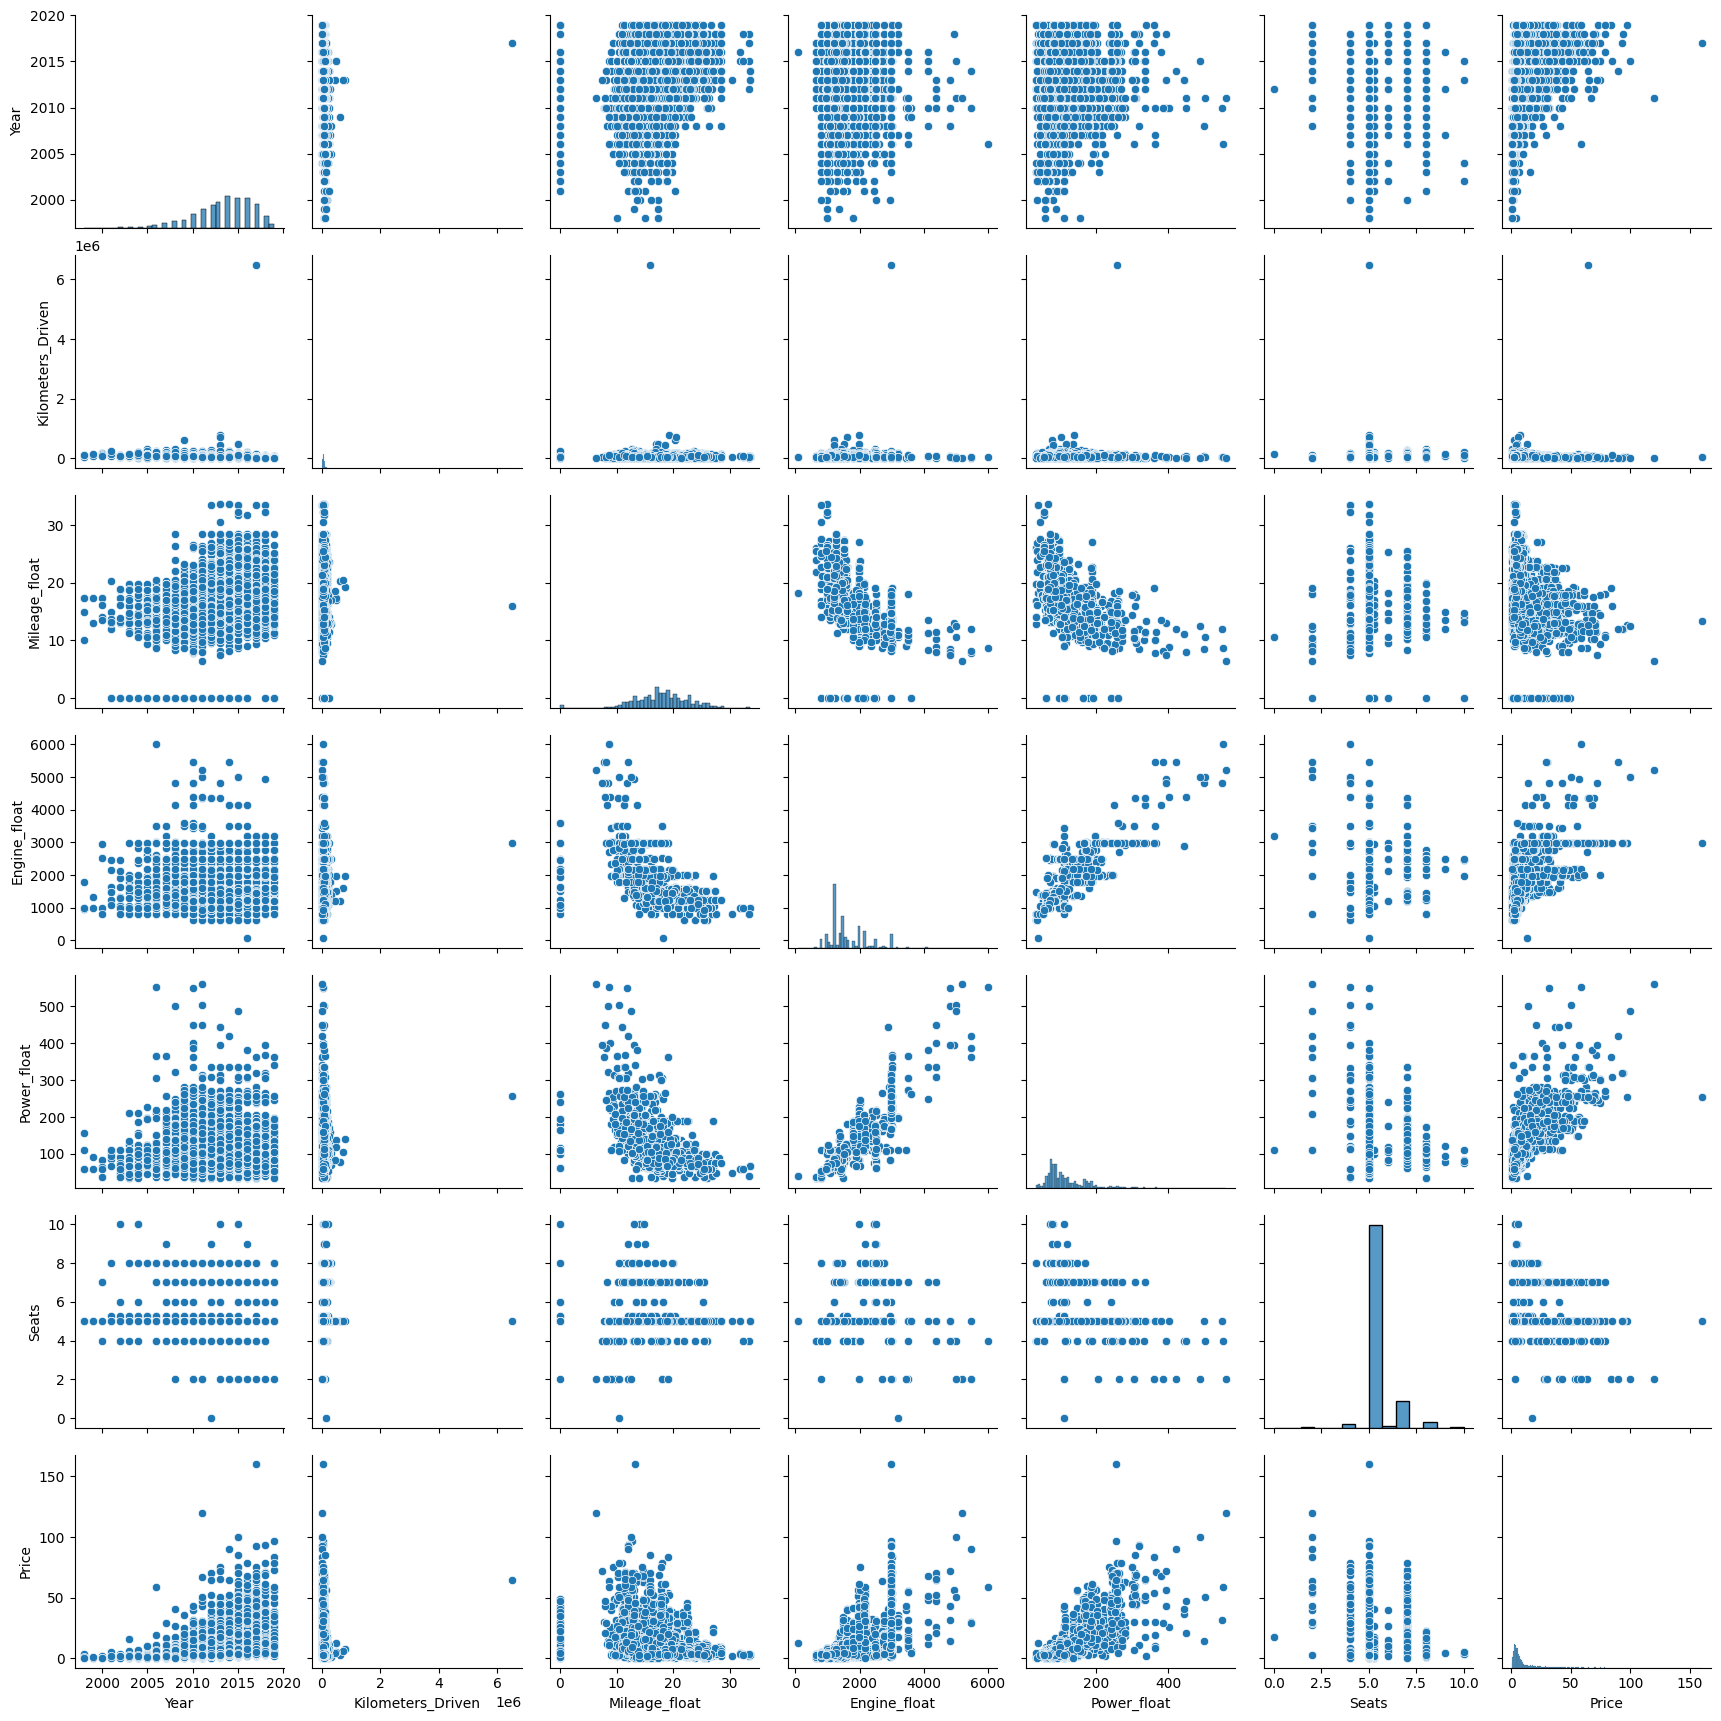

In [25]:
sns.pairplot(numeric_data)

산점도를 살펴봤을 때 상관계수에서 파악할 수 있었듯이 'Power_float', 'Engine_float' 가 높은 선형성을 띄는 것을 알 수 있다. \



변수들 간의 다중공선성을 좀 더 세밀하게 측정하기 위해 분산 팽창 계수인 VIF를 조사하였다. \
VIF는 Variacne Inflation Factor의 약자로, 어떤 변수의 다중공선성의 정도를 나타내는 수치이다. 각 변수마다의 VIF 계수가 존재한다. \

\

변수의 VIF 계수를 구하는 방법은 다음과 같다.\
VIF 계수를 구하려는 변수를 k라고 할 때, k를 종속 변수로 지정하고 기존의 나머지 변수를 독립변수로 하여 회귀분석을 진행한다. \

이렇게 진행한 회귀식의 결정계수 $R^2$를 이용하여 $VIF = 1/1(1-R^2)$라는 VIF 수식을 구한다. \

결정계수의 값은 0 ~ 1의 값을 가지므로 VIF의 값은 1 ~ $∞$의 범위를 갖는다. \

VIF의 값이 10보다 클 경우 위의 수식을 고려했을 때 결정계수의 값이 0.9보다 커진다는 것을 의미한다. \

결정계수의 값이 0.9보다 크면, 해당 VIF를 가진 독립변수가 없어도 나머지 변수들이 독립변수를 90% 이상 설명한다는 뜻이다. \

일반적으로 변수의 VIF 값이 10보다 크면 다중공선성을 띈다고 판단하고, 5보다 크면 주의깊게 볼 것을 권한다.

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
vif["features"] = numeric_data.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
0,117.305580,Year
5,70.866778,Seats
3,53.162203,Engine_float
4,36.349786,Power_float
2,26.629901,Mileage_float
6,4.291669,Price
1,1.441915,Kilometers_Driven


VIF 계수를 살펴봤을 때 다중공선성 의심 변수 : Year, Seats, Engine_float

In [60]:
numeric_data = numeric_data.drop(['Year'], axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
vif["features"] = numeric_data.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
3,18.812002,Seats
2,12.978756,Power_float
1,10.174581,Mileage_float
4,4.119857,Price
0,1.429653,Kilometers_Driven


Year 변수를 제거했을 때 전체적인 VIF 계수는 줄었지만 아직 변수들 간의 다중공선성은 높은 것으로 보인다.

In [59]:
numeric_data = numeric_data.drop(['Engine_float'], axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
vif["features"] = numeric_data.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
0,116.662217,Year
4,48.936679,Seats
2,25.267841,Mileage_float
3,16.759198,Power_float
5,4.276837,Price
1,1.430167,Kilometers_Driven


Engine_float 변수를 제거함으로써 전체적인 VIF 계수가 확연히 줄었지만,\
 아직 VIF 계수가 10보다 큰 변수들이 많은 것으로 판단된다.

In [61]:
numeric_data = numeric_data.drop(['Seats'], axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
vif["features"] = numeric_data.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
2,8.374597,Power_float
3,3.877712,Price
1,3.740507,Mileage_float
0,1.403600,Kilometers_Driven


Seats 변수를 제거함으로써 전체 변수의 VIF 계수가 10 이하로 떨어졌다. \
나머지 Power_float, Mileage_float, Kilometers_Driven 변수를 이용하여 회귀 분석을 진행한다.

In [62]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [63]:
X_train, X_test, y_train, y_test = train_test_split(numeric_data.iloc[:, 0:-1], numeric_data.iloc[:, -1], test_size = 0.2, random_state =42)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4815, 3), (1204, 3), (4815,), (1204,))

학습 데이터와 테스트 데이터 셋을 나눠준다.

In [65]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train.head()

,Kilometers_Driven,Mileage_float,Power_float
0,0.499221,0.093701,-0.630383
1,0.192235,1.010061,-0.271339
2,-1.453221,1.346279,-0.460123
3,2.467387,-1.139100,-0.233732
4,1.094774,1.049616,-0.731417


In [66]:
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test.head()

,Kilometers_Driven,Mileage_float,Power_float
0,0.308521,1.148504,-0.731417
1,-0.817794,-0.609501,0.129241
2,0.761616,-0.675427,0.503439
3,-0.144575,1.500105,-0.824779
4,1.134753,-3.993661,-0.034890


X_train, X_test 변수들의 평균, 분산의 차이가 너무 크므로 사이킷런의 StandardScaler를 이용하여 단위를 맞춰준다.

In [67]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [68]:
pred = model.predict(X_train)
model.score(X_train, y_train)

0.624831027583947

In [69]:
mean_squared_error(y_train, pred)

47.146355771807

In [70]:
test_pred = model.predict(X_test)
mean_squared_error(y_test, test_pred)

143.82759966206967

x_test에 대해 진행한 예측으로 측정한 MSE이다.

In [71]:
print(model.coef_)
print(model.intercept_)

[-1.81112417  0.8988003   9.08779339]
9.508147455867082


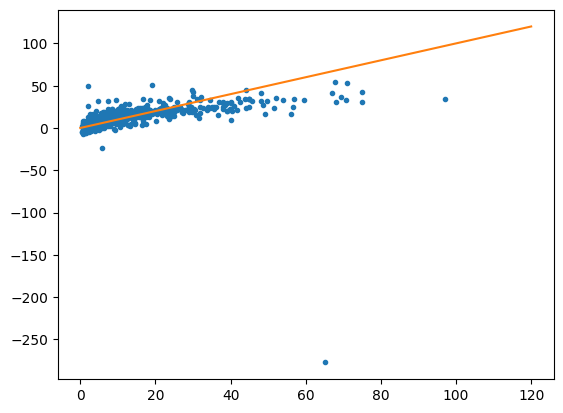

In [72]:
plt.plot(y_test, model.predict(X_test), '.')

x = np.linspace(0, 120)
y = x
plt.plot(x, y)
plt.show()

In [73]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.6248309844907737

L2 Norm을 이용한 규제인 Ridge 회귀식을 이용하여 회귀분석을 진행했다. \
Ridge 회귀식의 결정계수가 아무 규제를 적용하지 않았을 때의 결정계수보다 미세하게 줄어든 것을 볼 수 있다.

In [74]:
ridge_pred = ridge.predict(X_train)
mean_squared_error(y_train, ridge_pred)

47.14636118719643

In [75]:
ridge_test_pred = ridge.predict(X_test)
mean_squared_error(y_test, ridge_test_pred)

143.81435620753933

y_test에 대한 예측의 MSE를 구하였을 때 ridge 규제를 통한 회귀의 MSE 값이 약하게 줄어들어 성능이 아주 미세하게 증가한 것을 볼 수 있다.

In [76]:
ridge.score(X_test, y_test)

-0.16865715919186486

회귀 모델을 진단하기 위해 고려해야 할 네 가지의 항목이 있다.

1. 선형성(Linear) : 설명변수와 반응변수 간 선형관계
2. 정규성(Normality) : 오차의 정규성
3. 등분산성(Homoscedasticity) : 오차의 등분산성
4. 독립성(Independence) : 오차의 독립성



1. 선형성(Linear) 진단

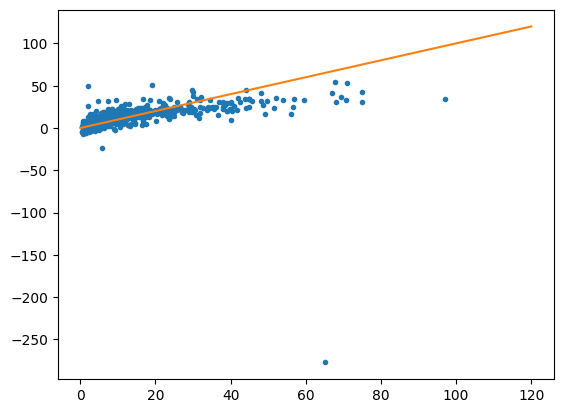

In [77]:
plt.plot(y_test, ridge.predict(X_test), '.')

x = np.linspace(0, 120)
y = x
plt.plot(x, y)
plt.show()

In [78]:
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.6215026043875584

In [79]:
lasso_pred = lasso.predict(X_train)
mean_squared_error(y_train, lasso_pred)

47.56462869871113

In [80]:
lasso_test_pred = lasso.predict(X_test)
mean_squared_error(y_test, lasso_test_pred)

124.46368065025332

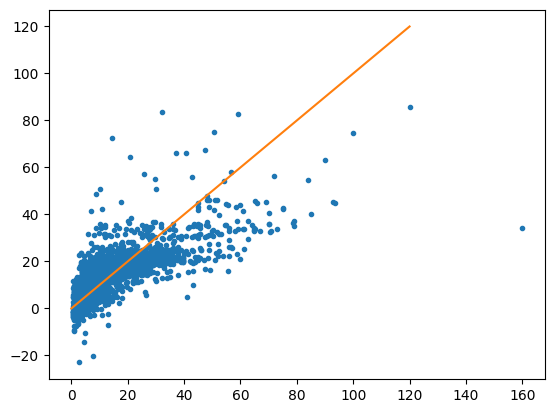

In [87]:
plt.plot(y_train, ridge.predict(X_train), '.')

x = np.linspace(0, 120)
y = x
plt.plot(x, y)
plt.show()

L1 norm을 이용한 Lasso 규제 회귀 모델의 y_test에 대한 MSE가 현저하게 낮은 것을 확인할 수 있다. \

과적합 문제가 더 잘 해결된 것으로 보인다.

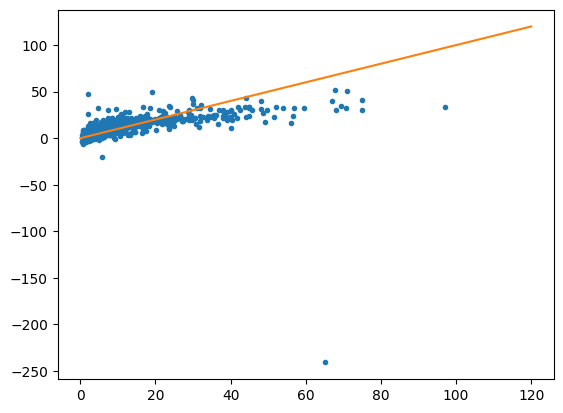

In [49]:
plt.plot(y_test, lasso.predict(X_test), '.')

x = np.linspace(0, 120)
y = x
plt.plot(x, y)
plt.show()

기존 선형회귀, Ridge, Lasso 모두 선형성을 잘 만족하는 것으로 보인다.

2. 정규성(Normality) 진단

In [50]:
import scipy.stats

In [88]:
pred = lasso.predict(X_train)

In [93]:
residual = y_train - pred

In [94]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

잔차의 정규성을 산점도 그래프를 이용하여 확인해보았다.

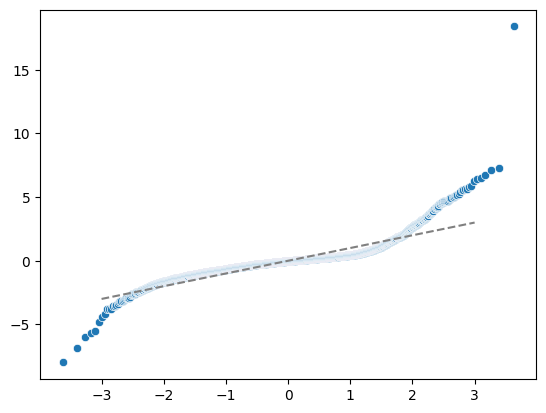

In [98]:
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

잔차들의 분포를 Normal Q-Q plot으로 그려봤을 때 직선의 형태를 잘 따
라가고 있는 추세로 보이지만,

직선을 한참 벗어난 잔차의 이상치가 존재하고 양 극단에서 직선을 약간 벗어나므로 성능 개선이 필요해보인다.

3. 등분산성(Homoscedasticity) 판단

<Axes: ylabel='Price'>

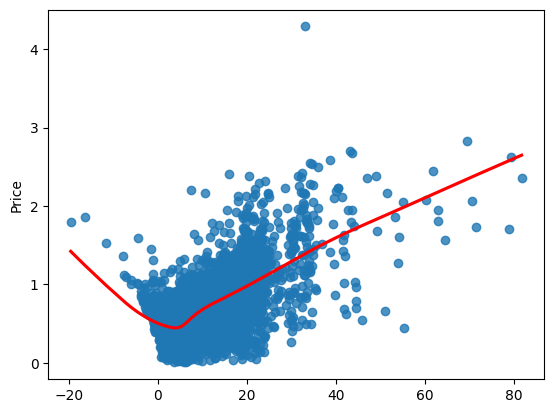

In [97]:
sns.regplot(x=pred, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

오차의 산점도를 나타낸 후, 오차 분포의 lowess 곡선이 일자(ㅡ)에 가까울 수록 오차의 분포가 고르다는 것을 알 수 있다. \

잔차가 특정 구간 안에서는 고르게 분포되어 있지만, 특정 구간에 몰려 있는 것을 알 수 있다.